<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/Copy_of_foodwtmgs_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Local Food Wastage Management System





##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Food wastage is a significant issue, with many households and restaurants discarding surplus food while numerous people struggle with food insecurity. This project aims to develop a Local Food Wastage Management System, where:

Restaurants and individuals can list surplus food.

NGOs or individuals in need can claim the food.

SQL stores available food details and locations.

A Streamlit app enables interaction, filtering, CRUD operation and visualization.


# **GitHub Link -**

# **Problem Statement**


Food wastage is a critical issue, with large amounts of surplus food discarded while many people struggle with hunger. This project develops a Local Food Wastage Management System where providers such as restaurants and households can list excess food, and NGOs or individuals in need can claim it. Data is managed in SQL, while a Streamlit app enables interaction, filtering, CRUD operations, and visualizations for effective food distribution.

#### **Define Your Business Objective?**

Business Use Cases

Connecting surplus food providers to those in need through a structured platform.

Reducing food waste by redistributing excess food efficiently.

Enhancing accessibility via geolocation features to locate food easily.

Data analysis on food wastage trends for better decision-making.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# Food Waste Managment

Import libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [ ]:
claims_df = pd.read_csv('claims_data.csv')
claims_df

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17
...,...,...,...,...,...
995,996,855,211,Completed,3/13/2025 19:40
996,997,980,746,Cancelled,3/17/2025 22:04
997,998,832,967,Cancelled,3/13/2025 18:00
998,999,917,90,Completed,3/1/2025 15:31


In [ ]:
claims_df.shape

(1000, 5)

1000 entrys and  5 columns are there

In [ ]:
foodlist_df = pd.read_csv("food_listings_data.csv")
foodlist_df

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner
...,...,...,...,...,...,...,...,...,...
995,996,Fish,15,3/30/2025,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,3/18/2025,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,3/22/2025,444,Restaurant,New Billy,Non-Vegetarian,Dinner
998,999,Pasta,15,3/30/2025,702,Supermarket,Lake Mistyton,Non-Vegetarian,Lunch


In [ ]:
foodlist_df.shape

(1000, 9)

1000 entrys and 9 columns are there

In [ ]:
provider_df = pd.read_csv("providers_data.csv")
provider_df

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577
...,...,...,...,...,...,...
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880


In [ ]:
provider_df.shape

(1000, 6)

1000 entrys and 6 columns are there

In [ ]:
receivers_df = pd.read_csv("receivers_data.csv")
receivers_df

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154
...,...,...,...,...,...
995,996,Matthew Curtis,Shelter,Lanechester,127-889-4442x1289
996,997,Amanda Cain,NGO,New Steven,+1-001-491-5601x5316
997,998,Theodore Briggs,Individual,South Sandra,930-609-9442x5031
998,999,Cheyenne Ramsey,NGO,Lake Jeffery,001-326-320-4816x15300


In [ ]:
receivers_df.shape

(1000, 5)

1000 entrys and 5 coluns are there

### Dataset Information

In [ ]:
claims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Claim_ID     1000 non-null   int64 
 1   Food_ID      1000 non-null   int64 
 2   Receiver_ID  1000 non-null   int64 
 3   Status       1000 non-null   object
 4   Timestamp    1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
claims_df.columns

Index(['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'], dtype='object')

In [ ]:
claims_df.dtypes


,0
Claim_ID,int64
Food_ID,int64
Receiver_ID,int64
Status,object
Timestamp,object


Timestamp is in object format converetd to datetime format

In [ ]:
claims_df["Timestamp"] = pd.to_datetime(claims_df['Timestamp'])

In [ ]:
claims_df.dtypes

,0
Claim_ID,int64
Food_ID,int64
Receiver_ID,int64
Status,object
Timestamp,datetime64[ns]


In [ ]:
foodlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Food_ID        1000 non-null   int64 
 1   Food_Name      1000 non-null   object
 2   Quantity       1000 non-null   int64 
 3   Expiry_Date    1000 non-null   object
 4   Provider_ID    1000 non-null   int64 
 5   Provider_Type  1000 non-null   object
 6   Location       1000 non-null   object
 7   Food_Type      1000 non-null   object
 8   Meal_Type      1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [ ]:
foodlist_df.columns

Index(['Food_ID', 'Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID',
       'Provider_Type', 'Location', 'Food_Type', 'Meal_Type'],
      dtype='object')

In [ ]:
foodlist_df.dtypes

,0
Food_ID,int64
Food_Name,object
Quantity,int64
Expiry_Date,object
Provider_ID,int64
Provider_Type,object
Location,object
Food_Type,object
Meal_Type,object


Expiry_Date is in object format. Change it into datetime formate

In [ ]:
foodlist_df['Expiry_Date'] = pd.to_datetime(foodlist_df['Expiry_Date'])

In [ ]:
foodlist_df.dtypes

,0
Food_ID,int64
Food_Name,object
Quantity,int64
Expiry_Date,datetime64[ns]
Provider_ID,int64
Provider_Type,object
Location,object
Food_Type,object
Meal_Type,object


In [ ]:
provider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
provider_df.columns

Index(['Provider_ID', 'Name', 'Type', 'Address', 'City', 'Contact'], dtype='object')

In [ ]:
provider_df.dtypes

,0
Provider_ID,int64
Name,object
Type,object
Address,object
City,object
Contact,object


In [ ]:
receivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [ ]:
receivers_df.columns

Index(['Receiver_ID', 'Name', 'Type', 'City', 'Contact'], dtype='object')

In [ ]:
receivers_df.dtypes

,0
Receiver_ID,int64
Name,object
Type,object
City,object
Contact,object


In [ ]:
claims_df.describe()

,Claim_ID,Food_ID,Receiver_ID,Timestamp
count,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,502.163000,492.437000,2025-03-11 11:20:59.400000
min,1.000000,1.000000,1.000000,2025-03-01 00:09:00
25%,250.750000,233.750000,256.000000,2025-03-06 17:42:15
50%,500.500000,504.500000,480.500000,2025-03-11 16:08:00
75%,750.250000,762.000000,742.250000,2025-03-16 09:29:45
max,1000.000000,999.000000,1000.000000,2025-03-21 06:12:00
std,288.819436,292.462255,284.487869,NaN


In [ ]:
foodlist_df.describe()

,Food_ID,Quantity,Expiry_Date,Provider_ID
count,1000.000000,1000.000000,1000,1000.000
mean,500.500000,25.794000,2025-03-23 00:24:28.800000,497.497
min,1.000000,1.000000,2025-03-16 00:00:00,1.000
25%,250.750000,13.000000,2025-03-19 00:00:00,241.000
50%,500.500000,26.000000,2025-03-23 00:00:00,498.500
75%,750.250000,39.000000,2025-03-27 00:00:00,752.000
max,1000.000000,50.000000,2025-03-30 00:00:00,1000.000
std,288.819436,14.609894,NaN,291.681


In [ ]:
provider_df.describe()

,Provider_ID
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [ ]:
receivers_df.describe()

,Receiver_ID
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


#### Duplicate Values

In [ ]:
print("Duplicates in receiver data:", claims_df.duplicated().sum())
print("Duplicates in foodlisting data:", foodlist_df.duplicated().sum())
print("Duplicates in provider data:", provider_df.duplicated().sum())
print("Duplicates in receiver data:", receivers_df.duplicated().sum())


Duplicates in receiver data: 0
Duplicates in foodlisting data: 0
Duplicates in provider data: 0
Duplicates in receiver data: 0


All these 4 dtataframes have no duplicated values

#### Missing Values/Null Values

In [ ]:
print("missing values in: ", claims_df.isnull().sum().sum())
print("missing values in: ", foodlist_df.isnull().sum().sum())
print("missing values in: ", provider_df.isnull().sum().sum())
print("missing values in: ", receivers_df.isnull().sum().sum())

missing values in:  0
missing values in:  0
missing values in:  0
missing values in:  0


All 4 dataframes have no missing values

### Variables Description

1. Providers Dataset

The providers.csv file contains details of food providers who contribute surplus food to the system.

Provider_ID  – Unique identifier for each provider.

Name  – Name of the food provider (e.g., restaurants, grocery stores, supermarkets).

Type  – Category of provider (e.g., Restaurant, Grocery Store, Supermarket).

Address  – Physical address of the provider.

City  – City where the provider is located.

Contact  – Contact information (e.g., phone number).

2. Receivers Dataset

The receivers.csv file contains details of individuals or organizations receiving food.

Receiver_ID  – Unique identifier for each receiver.

Name  – Name of the receiver (individual or organization).

Type  – Category of receiver (e.g., NGO, Community Center, Individual).

City  – City where the receiver is located.

Contact (String) – Contact details (e.g., phone number).

3. Food Listings Dataset

The food_listings.csv file stores details of available
food items that can be claimed by receivers.

Food_ID  – Unique identifier for each food item.

Food_Name  – Name of the food item.

Quantity  – Quantity available for distribution.

Expiry_Date  – Expiry date of the food item.

Provider_ID  – Reference to the provider offering the food.

Provider_Type  – Type of provider offering the food.

Location  – City where the food is available.

Food_Type  – Category of food (e.g., Vegetarian, Non-Vegetarian, Vegan).

Meal_Type  – Type of meal (e.g., Breakfast, Lunch, Dinner, Snacks).

4. Claims Dataset

The claims.csv file tracks food claims made by receivers.

Claim_ID  – Unique identifier for each claim.

Food_ID  – Reference to the food item being claimed.

Receiver_ID  – Reference to the receiver claiming the food.

Status  – Current status of the claim (e.g., Pending, Completed, Cancelled).

Timestamp – Date and time when the claim was made.


In [ ]:
# Check Unique Values for each variable.
claims_df.nunique()


,0
Claim_ID,1000
Food_ID,647
Receiver_ID,624
Status,3
Timestamp,976


In [ ]:
foodlist_df.nunique()


,0
Food_ID,1000
Food_Name,10
Quantity,50
Expiry_Date,15
Provider_ID,637
Provider_Type,4
Location,624
Food_Type,3
Meal_Type,4


In [ ]:
provider_df.nunique()


,0
Provider_ID,1000
Name,973
Type,4
Address,1000
City,963
Contact,1000


In [ ]:
receivers_df.nunique()


,0
Receiver_ID,1000
Name,992
Type,4
City,966
Contact,1000


In [ ]:
claims_df.head(2)

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,2025-03-05 05:26:00
1,2,353,391,Cancelled,2025-03-11 10:24:00


In [ ]:
foodlist_df.head(2)

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,2025-03-24,791,Grocery Store,West James,Non-Vegetarian,Dinner


In [ ]:
provider_df.head(2)

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297


In [ ]:
receivers_df.head(2)

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570


# Connect to SQL Database

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 50.0 MB/s eta 0:00:00


In [ ]:
import mysql.connector

In [ ]:
!apt-get update
!apt-get install -y mysql-server
!service mysql start

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,628 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,783 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubunt

In [ ]:
!service mysql start
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY ''; FLUSH PRIVILEGES;"


 * Starting MySQL database server mysqld
   ...done.


In [ ]:
db = mysql.connector.connect(
host = "localhost",
user = "root",
password = "",

)
cursor = db.cursor()

In [ ]:
cursor.execute("CREATE DATABASE IF NOT EXISTS food_waste_mgts")
print(" Database created (or already exists)")

 Database created (or already exists)


In [ ]:
#Connect to the new database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="food_waste_mgts"
)
cursor = conn.cursor()
print("database connected")

database connected


In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS claims (
    Claim_ID  INTEGER PRIMARY KEY,
    Food_ID integer,
    Receiver_ID   integer,
    Status TEXT,
    Timestamp Text
)
""")

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS foodlisting (
   Food_ID  INTEGER PRIMARY KEY,
    Food_Name    Text,
    Quantity   integer,
   Expiry_Date  datetime,
   Provider_ID   integer,
   Provider_Type Text,
   Location  Text,
   Food_Type  Text,
   Meal_Type Text
)
""")

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS providers (
   Provider_ID   INTEGER PRIMARY KEY,
   Name    Text,
   Type Text,
   Address  Text,
   City  Text,
   Contact integer
)
""")


In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS receivers (
   Receiver_ID   INTEGER PRIMARY KEY,
    Name    Text,
    Type   Text,
   City   Text,
   Contact Text
)
""")

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS foodlisting1 (
   Food_ID  INTEGER PRIMARY KEY,
    Food_Name    Text,
    Quantity   integer,
   Expiry_Date  datetime,
   Provider_ID   integer,
   Provider_Type Text,
   Location  Text,
   Food_Type  Text,
   Meal_Type Text,
   Wasted    Text
)
""")

In [ ]:

# Create SQLAlchemy engine for MySQL
engine = create_engine("mysql+mysqlconnector://root:@localhost/food_waste_mgts")

In [ ]:
from sqlalchemy import create_engine
conn.commit()


In [ ]:
claims_df.to_sql("claims", con=engine, if_exists="replace", index=False)
print("DataFrame successfully written to the 'claims' table.")


DataFrame successfully written to the 'claims' table.


In [ ]:
foodlist_df.to_sql("foodlisting", con=engine, if_exists="replace", index=False)
print("DataFrame successfully written to the 'foodlisting' table.")

DataFrame successfully written to the 'foodlisting' table.


In [ ]:
provider_df.to_sql("providers", con=engine, if_exists="replace", index=False)
print("DataFrame successfully written to the 'providers' table.")

DataFrame successfully written to the 'providers' table.


In [ ]:
receivers_df.to_sql("receivers", con=engine, if_exists="replace", index=False)
print("DataFrame successfully written to the 'receivers' table.")

DataFrame successfully written to the 'receivers' table.


In [ ]:
foodlistdata1_df = pd.read_csv("foodlistingdata1_df.csv")

In [ ]:
foodlistdata1_df.to_sql("foodlisting1", con=engine, if_exists="replace", index=False)
print("DataFrame successfully written to the 'foodlisting1' table.")

DataFrame successfully written to the 'foodlisting1' table.


In [ ]:
# -------------------- CREATE ----------------------------------------
def create_receiver(receiver_id, name, type_, city, contact):
    sql = """
    INSERT INTO receivers (Receiver_ID, Name, Type, City, Contact)
    VALUES (%s, %s, %s, %s, %s)
    """
    try:
        cursor.execute(sql, (receiver_id, name, type_, city, contact))
        conn.commit()
        print("Record added successfully.")
    except mysql.connector.Error as err:
        print(f"Error: {err}")

# -------------------- READ --------------------------------------------
def read_receivers():
    sql = "SELECT * FROM receivers"
    cursor.execute(sql)
    rows = cursor.fetchall()
    print("\n Receivers Table:")
    for row in rows:
        print(row)

# -------------------- UPDATE --------------------
def update_receiver(receiver_id, name=None, type_=None, city=None, contact=None):
    updates = []
    values = []

    if name:
        updates.append("Name = %s")
        values.append(name)
    if type_:
        updates.append("Type = %s")
        values.append(type_)
    if city:
        updates.append("City = %s")
        values.append(city)
    if contact:
        updates.append("Contact = %s")
        values.append(contact)

    if updates:
        sql = f"UPDATE receivers SET {', '.join(updates)} WHERE Receiver_ID = %s"
        values.append(receiver_id)
        try:
            cursor.execute(sql, tuple(values))
            conn.commit()
            print(" Record updated successfully.")
        except mysql.connector.Error as err:
            print(f" Error: {err}")
    else:
        print(" No fields to update.")

# -------------------- DELETE --------------------
def delete_receiver(receiver_id):
    sql = "DELETE FROM receivers WHERE Receiver_ID = %s"
    try:
        cursor.execute(sql, (receiver_id,))
        conn.commit()
        print(" Record deleted successfully.")
    except mysql.connector.Error as err:
        print(f" Error: {err}")


In [ ]:
# -------------------- CREATE --------------------
def create_claim(claim_id, food_id, receiver_id, status, timestamp=None):
    if not timestamp:
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    sql = """
    INSERT INTO claims (Claim_ID, Food_ID, Receiver_ID, Status, Timestamp)
    VALUES (%s, %s, %s, %s, %s)
    """
    try:
        cursor.execute(sql, (claim_id, food_id, receiver_id, status, timestamp))
        conn.commit()
        print(" Claim added successfully.")
    except mysql.connector.Error as err:
        print(f" Error: {err}")

# -------------------- READ --------------------
def read_claims():
    sql = "SELECT * FROM claims"
    cursor.execute(sql)
    rows = cursor.fetchall()
    print("\n Claims Table:")
    for row in rows:
        print(row)

# -------------------- UPDATE --------------------
def update_claim(claim_id, food_id=None, receiver_id=None, status=None, timestamp=None):
    updates = []
    values = []

    if food_id:
        updates.append("Food_ID = %s")
        values.append(food_id)
    if receiver_id:
        updates.append("Receiver_ID = %s")
        values.append(receiver_id)
    if status:
        updates.append("Status = %s")
        values.append(status)
    if timestamp:
        updates.append("Timestamp = %s")
        values.append(timestamp)

    if updates:
        sql = f"UPDATE claims SET {', '.join(updates)} WHERE Claim_ID = %s"
        values.append(claim_id)
        try:
            cursor.execute(sql, tuple(values))
            conn.commit()
            print(" Claim updated successfully.")
        except mysql.connector.Error as err:
            print(f"Error: {err}")
    else:
        print(" No fields to update.")

# -------------------- DELETE --------------------
def delete_claim(claim_id):
    sql = "DELETE FROM claims WHERE Claim_ID = %s"
    try:
        cursor.execute(sql, (claim_id,))
        conn.commit()
        print(" Claim deleted successfully.")
    except mysql.connector.Error as err:
        print(f" Error: {err}")

In [ ]:
# -------------------- CREATE --------------------
def create_provider(provider_id, name, type,address, city, contact):
    sql = """
    INSERT INTO providers (Provider_ID, Name, Type,Address, City, Contact)
    VALUES (%s, %s, %s, %s, %s,%s)
    """
    try:
        cursor.execute(sql, (provider_id, name, type,address, city, contact))
        conn.commit()
        print(" Provider added successfully.")
    except mysql.connector.Error as err:
        print(f" Error: {err}")

# -------------------- READ --------------------
def read_providers():
    sql = "SELECT * FROM providers"
    cursor.execute(sql)
    rows = cursor.fetchall()
    print("\n Providers Table:")
    for row in rows:
        print(row)

# -------------------- UPDATE --------------------
def update_provider(provider_id, name=None, type_=None,address=0, city=None, contact=None):
    updates = []
    values = []

    if name:
        updates.append("Name = %s")
        values.append(name)
    if type_:
        updates.append("Type = %s")
        values.append(type_)
    if city:
        updates.append("City = %s")
        values.append(city)
    if address:
        updates.append("Address = %s")
        values.append(address)
    if contact:
        updates.append("Contact = %s")
        values.append(contact)

    if updates:
        sql = f"UPDATE providers SET {', '.join(updates)} WHERE Provider_ID = %s"
        values.append(provider_id)
        try:
            cursor.execute(sql, tuple(values))
            conn.commit()
            print(" Provider updated successfully.")
        except mysql.connector.Error as err:
            print(f" Error: {err}")
    else:
        print(" No fields to update.")

# -------------------- DELETE --------------------
def delete_provider(provider_id):
    sql = "DELETE FROM providers WHERE Provider_ID = %s"
    try:
        cursor.execute(sql, (provider_id,))
        conn.commit()
        print(" Provider deleted successfully.")
    except mysql.connector.Error as err:
        print(f" Error: {err}")


In [ ]:
# -------------------- CREATE --------------------
def create_foodlisting(food_id, food_name, quantity, expiry_date,provider_id,provider_type,location,food_type,meal_type):
    sql = """
    INSERT INTO foodlisting (Food_ID, Food_Name, Quantity, Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type)
    VALUES (%s, %s, %s, %s, %s, %s,%s,%s,%s)
    """
    try:
        cursor.execute(sql, (food_id, food_name, quantity, expiry_date,provider_id,provider_type,location,food_type,meal_type))
        conn.commit()
        print(" Food listing added successfully.")
    except mysql.connector.Error as err:
        print(f" Error: {err}")

# -------------------- READ --------------------
def read_foodlistings():
    sql = "SELECT * FROM foodlisting"
    cursor.execute(sql)
    rows = cursor.fetchall()
    print("\n Food Listings Table:")
    for row in rows:
        print(row)

# -------------------- UPDATE --------------------
def update_foodlisting(food_id, food_name=None, quantity=None, expiry_date=None, provider_id=None ,provider_type=None,location=None,food_type=None,meal_type=None):
    updates = []
    values = []

    if provider_id:
        updates.append("Food_ID = %s")
        values.append(provider_id)
    if food_name:
        updates.append("Food_Name = %s")
        values.append(food_name)
    if quantity:
        updates.append("Quantity = %s")
        values.append(quantity)
    if expiry_date:
        updates.append("Expiry_Date = %s")
        values.append(expiry_date)

    if provider_id:
        updates.append("Provider_ID = %s")
        values.append(provider_id)
    if provider_id:
        updates.append("Provider_Type = %s")
        values.append(provider_type)
    if provider_id:
        updates.append("Location = %s")
        values.append(location)

    if provider_id:
        updates.append("Meal_Type = %s")
        values.append(meal_type)

    if updates:
        sql = f"UPDATE foodlisting SET {', '.join(updates)} WHERE Food_ID = %s"
        values.append(food_id)
        try:
            cursor.execute(sql, tuple(values))
            conn.commit()
            print(" Food listing updated successfully.")
        except mysql.connector.Error as err:
            print(f" Error: {err}")
    else:
        print(" No fields to update.")

# -------------------- DELETE --------------------
def delete_foodlisting(food_id):
    sql = "DELETE FROM foodlisting WHERE Food_ID = %s"
    try:
        cursor.execute(sql, (food_id,))
        conn.commit()
        print(" Food listing deleted successfully.")
    except mysql.connector.Error as err:
        print(f" Error: {err}")

In [ ]:
read_foodlistings()


 Food Listings Table:
(1, 'Bread', 43, datetime.datetime(2025, 3, 17, 0, 0), 110, 'Grocery Store', 'South Kellyville', 'Non-Vegetarian', 'Breakfast')
(2, 'Soup', 22, datetime.datetime(2025, 3, 24, 0, 0), 791, 'Grocery Store', 'West James', 'Non-Vegetarian', 'Dinner')
(3, 'Fruits', 46, datetime.datetime(2025, 3, 28, 0, 0), 478, 'Catering Service', 'Lake Regina', 'Vegan', 'Breakfast')
(4, 'Fruits', 15, datetime.datetime(2025, 3, 16, 0, 0), 930, 'Restaurant', 'Kellytown', 'Vegan', 'Lunch')
(5, 'Soup', 14, datetime.datetime(2025, 3, 19, 0, 0), 279, 'Restaurant', 'Garciaport', 'Vegan', 'Dinner')
(6, 'Vegetables', 4, datetime.datetime(2025, 3, 24, 0, 0), 378, 'Supermarket', 'South Johnshire', 'Vegan', 'Snacks')
(7, 'Dairy', 29, datetime.datetime(2025, 3, 25, 0, 0), 268, 'Grocery Store', 'Nolanmouth', 'Vegan', 'Dinner')
(8, 'Rice', 49, datetime.datetime(2025, 3, 28, 0, 0), 343, 'Catering Service', 'South Christopherborough', 'Vegetarian', 'Lunch')
(9, 'Bread', 46, datetime.datetime(2025, 3, 

In [ ]:
read_providers()


 Providers Table:
(1, 'Gonzales-Cochran', 'Supermarket', '74347 Christopher Extensions\nAndreamouth, OK 91839', 'New Jessica', '+1-600-220-0480')
(2, 'Nielsen, Johnson and Fuller', 'Grocery Store', '91228 Hanson Stream\nWelchtown, OR 27136', 'East Sheena', '+1-925-283-8901x6297')
(3, 'Miller-Black', 'Supermarket', '561 Martinez Point Suite 507\nGuzmanchester, WA 94320', 'Lake Jesusview', '001-517-295-2206')
(4, 'Clark, Prince and Williams', 'Grocery Store', '467 Bell Trail Suite 409\nPort Jesus, IA 61188', 'Mendezmouth', '556.944.8935x401')
(5, 'Coleman-Farley', 'Grocery Store', '078 Matthew Creek Apt. 319\nSaraborough, MA 53978', 'Valentineside', '193.714.6577')
(6, 'Lawson-Walters', 'Grocery Store', '1889 Barnes Gateway\nAdamview, ID 87971', 'Shannonside', '144-860-6074x60544')
(7, 'Ortiz-Lee', 'Restaurant', '1842 Villarreal Shores\nWilliamfort, CT 44529', 'Lake Christopherburgh', '(563)889-7190')
(8, 'Curtis-Lewis', 'Supermarket', '4770 Miller Light Suite 260\nNew Charlesville, AR 

In [ ]:
read_receivers()


 Receivers Table:
(1, 'Donald Gomez', 'Shelter', 'Port Carlburgh', '(955)922-5295')
(2, 'Laurie Ramos', 'Individual', 'Lewisburgh', '761.042.1570')
(3, 'Ashley Mckee', 'NGO', 'South Randalltown', '691-023-0094x856')
(4, 'Erika Rose', 'NGO', 'South Shaneville', '8296491111')
(5, 'John Romero', 'Individual', 'Bakerport', '067.491.0154')
(6, 'Mandy Sutton PhD', 'Shelter', 'East Sharimouth', '682-777-5357')
(7, 'Kenneth Baker', 'NGO', 'South Edwinborough', '126-645-6386x4071')
(8, 'James Perez', 'Charity', 'Benjaminburgh', '+1-986-748-6688')
(9, 'Emily Turner', 'Shelter', 'West Robert', '001-631-022-6157x520')
(10, 'Mary Salazar', 'NGO', 'Wrightland', '001-187-333-7518x11395')
(11, 'Amber Pacheco', 'Individual', 'South Gregorymouth', '+1-155-960-7276')
(12, 'Jennifer Bishop', 'NGO', 'Katherineside', '+1-801-363-6355x49805')
(13, 'Jamie Sutton', 'Shelter', 'Lake Matthewstad', '001-176-847-8920x2687')
(14, 'Brian Fischer', 'Shelter', 'Burkeside', '947-041-3246x326')
(15, 'Donald Kelly', 'NG

In [ ]:
read_claims()


 Claims Table:
(1, 164, 908, 'Pending', datetime.datetime(2025, 3, 5, 5, 26))
(2, 353, 391, 'Cancelled', datetime.datetime(2025, 3, 11, 10, 24))
(3, 626, 492, 'Completed', datetime.datetime(2025, 3, 21, 0, 59))
(4, 61, 933, 'Cancelled', datetime.datetime(2025, 3, 4, 9, 8))
(5, 345, 229, 'Pending', datetime.datetime(2025, 3, 14, 15, 17))
(6, 273, 607, 'Cancelled', datetime.datetime(2025, 3, 2, 2, 50))
(7, 735, 256, 'Cancelled', datetime.datetime(2025, 3, 7, 23, 58))
(8, 382, 900, 'Pending', datetime.datetime(2025, 3, 5, 7, 7))
(9, 278, 807, 'Completed', datetime.datetime(2025, 3, 18, 2, 26))
(10, 669, 975, 'Completed', datetime.datetime(2025, 3, 6, 19, 57))
(11, 290, 118, 'Pending', datetime.datetime(2025, 3, 4, 23, 1))
(12, 694, 739, 'Completed', datetime.datetime(2025, 3, 1, 21, 55))
(13, 951, 959, 'Pending', datetime.datetime(2025, 3, 8, 13, 8))
(14, 426, 233, 'Cancelled', datetime.datetime(2025, 3, 8, 16, 8))
(15, 684, 97, 'Completed', datetime.datetime(2025, 3, 7, 8, 0))
(16, 320,

Receivers

In [ ]:
create_receiver(1001, 'sree', 'charity', 'banglore', 7887990212)

Record added successfully.


In [ ]:
read_receivers()


 Receivers Table:
(1, 'Donald Gomez', 'Shelter', 'Port Carlburgh', '(955)922-5295')
(2, 'Laurie Ramos', 'Individual', 'Lewisburgh', '761.042.1570')
(3, 'Ashley Mckee', 'NGO', 'South Randalltown', '691-023-0094x856')
(4, 'Erika Rose', 'NGO', 'South Shaneville', '8296491111')
(5, 'John Romero', 'Individual', 'Bakerport', '067.491.0154')
(6, 'Mandy Sutton PhD', 'Shelter', 'East Sharimouth', '682-777-5357')
(7, 'Kenneth Baker', 'NGO', 'South Edwinborough', '126-645-6386x4071')
(8, 'James Perez', 'Charity', 'Benjaminburgh', '+1-986-748-6688')
(9, 'Emily Turner', 'Shelter', 'West Robert', '001-631-022-6157x520')
(10, 'Mary Salazar', 'NGO', 'Wrightland', '001-187-333-7518x11395')
(11, 'Amber Pacheco', 'Individual', 'South Gregorymouth', '+1-155-960-7276')
(12, 'Jennifer Bishop', 'NGO', 'Katherineside', '+1-801-363-6355x49805')
(13, 'Jamie Sutton', 'Shelter', 'Lake Matthewstad', '001-176-847-8920x2687')
(14, 'Brian Fischer', 'Shelter', 'Burkeside', '947-041-3246x326')
(15, 'Donald Kelly', 'NG

In [ ]:
update_receiver(1001,name='kala')

 Record updated successfully.


In [ ]:
read_receivers()


 Receivers Table:
(1, 'Donald Gomez', 'Shelter', 'Port Carlburgh', '(955)922-5295')
(2, 'Laurie Ramos', 'Individual', 'Lewisburgh', '761.042.1570')
(3, 'Ashley Mckee', 'NGO', 'South Randalltown', '691-023-0094x856')
(4, 'Erika Rose', 'NGO', 'South Shaneville', '8296491111')
(5, 'John Romero', 'Individual', 'Bakerport', '067.491.0154')
(6, 'Mandy Sutton PhD', 'Shelter', 'East Sharimouth', '682-777-5357')
(7, 'Kenneth Baker', 'NGO', 'South Edwinborough', '126-645-6386x4071')
(8, 'James Perez', 'Charity', 'Benjaminburgh', '+1-986-748-6688')
(9, 'Emily Turner', 'Shelter', 'West Robert', '001-631-022-6157x520')
(10, 'Mary Salazar', 'NGO', 'Wrightland', '001-187-333-7518x11395')
(11, 'Amber Pacheco', 'Individual', 'South Gregorymouth', '+1-155-960-7276')
(12, 'Jennifer Bishop', 'NGO', 'Katherineside', '+1-801-363-6355x49805')
(13, 'Jamie Sutton', 'Shelter', 'Lake Matthewstad', '001-176-847-8920x2687')
(14, 'Brian Fischer', 'Shelter', 'Burkeside', '947-041-3246x326')
(15, 'Donald Kelly', 'NG

In [ ]:
delete_receiver(1001)

 Record deleted successfully.


In [ ]:
read_receivers()


 Receivers Table:
(1, 'Donald Gomez', 'Shelter', 'Port Carlburgh', '(955)922-5295')
(2, 'Laurie Ramos', 'Individual', 'Lewisburgh', '761.042.1570')
(3, 'Ashley Mckee', 'NGO', 'South Randalltown', '691-023-0094x856')
(4, 'Erika Rose', 'NGO', 'South Shaneville', '8296491111')
(5, 'John Romero', 'Individual', 'Bakerport', '067.491.0154')
(6, 'Mandy Sutton PhD', 'Shelter', 'East Sharimouth', '682-777-5357')
(7, 'Kenneth Baker', 'NGO', 'South Edwinborough', '126-645-6386x4071')
(8, 'James Perez', 'Charity', 'Benjaminburgh', '+1-986-748-6688')
(9, 'Emily Turner', 'Shelter', 'West Robert', '001-631-022-6157x520')
(10, 'Mary Salazar', 'NGO', 'Wrightland', '001-187-333-7518x11395')
(11, 'Amber Pacheco', 'Individual', 'South Gregorymouth', '+1-155-960-7276')
(12, 'Jennifer Bishop', 'NGO', 'Katherineside', '+1-801-363-6355x49805')
(13, 'Jamie Sutton', 'Shelter', 'Lake Matthewstad', '001-176-847-8920x2687')
(14, 'Brian Fischer', 'Shelter', 'Burkeside', '947-041-3246x326')
(15, 'Donald Kelly', 'NG

claims

In [ ]:
create_claim(1001,626,908,'pending',"2025-03-05 05:26:00")

 Claim added successfully.


In [ ]:
read_claims()


 Claims Table:
(1, 164, 908, 'Pending', datetime.datetime(2025, 3, 5, 5, 26))
(2, 353, 391, 'Cancelled', datetime.datetime(2025, 3, 11, 10, 24))
(3, 626, 492, 'Completed', datetime.datetime(2025, 3, 21, 0, 59))
(4, 61, 933, 'Cancelled', datetime.datetime(2025, 3, 4, 9, 8))
(5, 345, 229, 'Pending', datetime.datetime(2025, 3, 14, 15, 17))
(6, 273, 607, 'Cancelled', datetime.datetime(2025, 3, 2, 2, 50))
(7, 735, 256, 'Cancelled', datetime.datetime(2025, 3, 7, 23, 58))
(8, 382, 900, 'Pending', datetime.datetime(2025, 3, 5, 7, 7))
(9, 278, 807, 'Completed', datetime.datetime(2025, 3, 18, 2, 26))
(10, 669, 975, 'Completed', datetime.datetime(2025, 3, 6, 19, 57))
(11, 290, 118, 'Pending', datetime.datetime(2025, 3, 4, 23, 1))
(12, 694, 739, 'Completed', datetime.datetime(2025, 3, 1, 21, 55))
(13, 951, 959, 'Pending', datetime.datetime(2025, 3, 8, 13, 8))
(14, 426, 233, 'Cancelled', datetime.datetime(2025, 3, 8, 16, 8))
(15, 684, 97, 'Completed', datetime.datetime(2025, 3, 7, 8, 0))
(16, 320,

In [ ]:
update_claim(1001,food_id=832)

 Claim updated successfully.


In [ ]:
read_claims()


 Claims Table:
(1, 164, 908, 'Pending', datetime.datetime(2025, 3, 5, 5, 26))
(2, 353, 391, 'Cancelled', datetime.datetime(2025, 3, 11, 10, 24))
(3, 626, 492, 'Completed', datetime.datetime(2025, 3, 21, 0, 59))
(4, 61, 933, 'Cancelled', datetime.datetime(2025, 3, 4, 9, 8))
(5, 345, 229, 'Pending', datetime.datetime(2025, 3, 14, 15, 17))
(6, 273, 607, 'Cancelled', datetime.datetime(2025, 3, 2, 2, 50))
(7, 735, 256, 'Cancelled', datetime.datetime(2025, 3, 7, 23, 58))
(8, 382, 900, 'Pending', datetime.datetime(2025, 3, 5, 7, 7))
(9, 278, 807, 'Completed', datetime.datetime(2025, 3, 18, 2, 26))
(10, 669, 975, 'Completed', datetime.datetime(2025, 3, 6, 19, 57))
(11, 290, 118, 'Pending', datetime.datetime(2025, 3, 4, 23, 1))
(12, 694, 739, 'Completed', datetime.datetime(2025, 3, 1, 21, 55))
(13, 951, 959, 'Pending', datetime.datetime(2025, 3, 8, 13, 8))
(14, 426, 233, 'Cancelled', datetime.datetime(2025, 3, 8, 16, 8))
(15, 684, 97, 'Completed', datetime.datetime(2025, 3, 7, 8, 0))
(16, 320,

In [ ]:
delete_claim(1001)

 Claim deleted successfully.


In [ ]:
read_claims()


 Claims Table:
(1, 164, 908, 'Pending', datetime.datetime(2025, 3, 5, 5, 26))
(2, 353, 391, 'Cancelled', datetime.datetime(2025, 3, 11, 10, 24))
(3, 626, 492, 'Completed', datetime.datetime(2025, 3, 21, 0, 59))
(4, 61, 933, 'Cancelled', datetime.datetime(2025, 3, 4, 9, 8))
(5, 345, 229, 'Pending', datetime.datetime(2025, 3, 14, 15, 17))
(6, 273, 607, 'Cancelled', datetime.datetime(2025, 3, 2, 2, 50))
(7, 735, 256, 'Cancelled', datetime.datetime(2025, 3, 7, 23, 58))
(8, 382, 900, 'Pending', datetime.datetime(2025, 3, 5, 7, 7))
(9, 278, 807, 'Completed', datetime.datetime(2025, 3, 18, 2, 26))
(10, 669, 975, 'Completed', datetime.datetime(2025, 3, 6, 19, 57))
(11, 290, 118, 'Pending', datetime.datetime(2025, 3, 4, 23, 1))
(12, 694, 739, 'Completed', datetime.datetime(2025, 3, 1, 21, 55))
(13, 951, 959, 'Pending', datetime.datetime(2025, 3, 8, 13, 8))
(14, 426, 233, 'Cancelled', datetime.datetime(2025, 3, 8, 16, 8))
(15, 684, 97, 'Completed', datetime.datetime(2025, 3, 7, 8, 0))
(16, 320,

Foodlistings

In [ ]:
create_foodlisting(1001,'rice',100,"2025-03-05 05:26:00",1001,'groceroy','us','vegitarian','lunch')

 Food listing added successfully.


In [ ]:
read_foodlistings()


 Food Listings Table:
(1, 'Bread', 43, datetime.datetime(2025, 3, 17, 0, 0), 110, 'Grocery Store', 'South Kellyville', 'Non-Vegetarian', 'Breakfast')
(2, 'Soup', 22, datetime.datetime(2025, 3, 24, 0, 0), 791, 'Grocery Store', 'West James', 'Non-Vegetarian', 'Dinner')
(3, 'Fruits', 46, datetime.datetime(2025, 3, 28, 0, 0), 478, 'Catering Service', 'Lake Regina', 'Vegan', 'Breakfast')
(4, 'Fruits', 15, datetime.datetime(2025, 3, 16, 0, 0), 930, 'Restaurant', 'Kellytown', 'Vegan', 'Lunch')
(5, 'Soup', 14, datetime.datetime(2025, 3, 19, 0, 0), 279, 'Restaurant', 'Garciaport', 'Vegan', 'Dinner')
(6, 'Vegetables', 4, datetime.datetime(2025, 3, 24, 0, 0), 378, 'Supermarket', 'South Johnshire', 'Vegan', 'Snacks')
(7, 'Dairy', 29, datetime.datetime(2025, 3, 25, 0, 0), 268, 'Grocery Store', 'Nolanmouth', 'Vegan', 'Dinner')
(8, 'Rice', 49, datetime.datetime(2025, 3, 28, 0, 0), 343, 'Catering Service', 'South Christopherborough', 'Vegetarian', 'Lunch')
(9, 'Bread', 46, datetime.datetime(2025, 3, 

In [ ]:
update_foodlisting(1001,food_name='basumathi')

 Food listing updated successfully.


In [ ]:
read_foodlistings()


 Food Listings Table:
(1, 'Bread', 43, datetime.datetime(2025, 3, 17, 0, 0), 110, 'Grocery Store', 'South Kellyville', 'Non-Vegetarian', 'Breakfast')
(2, 'Soup', 22, datetime.datetime(2025, 3, 24, 0, 0), 791, 'Grocery Store', 'West James', 'Non-Vegetarian', 'Dinner')
(3, 'Fruits', 46, datetime.datetime(2025, 3, 28, 0, 0), 478, 'Catering Service', 'Lake Regina', 'Vegan', 'Breakfast')
(4, 'Fruits', 15, datetime.datetime(2025, 3, 16, 0, 0), 930, 'Restaurant', 'Kellytown', 'Vegan', 'Lunch')
(5, 'Soup', 14, datetime.datetime(2025, 3, 19, 0, 0), 279, 'Restaurant', 'Garciaport', 'Vegan', 'Dinner')
(6, 'Vegetables', 4, datetime.datetime(2025, 3, 24, 0, 0), 378, 'Supermarket', 'South Johnshire', 'Vegan', 'Snacks')
(7, 'Dairy', 29, datetime.datetime(2025, 3, 25, 0, 0), 268, 'Grocery Store', 'Nolanmouth', 'Vegan', 'Dinner')
(8, 'Rice', 49, datetime.datetime(2025, 3, 28, 0, 0), 343, 'Catering Service', 'South Christopherborough', 'Vegetarian', 'Lunch')
(9, 'Bread', 46, datetime.datetime(2025, 3, 

In [ ]:
delete_foodlisting(1001)

 Food listing deleted successfully.


In [ ]:
read_foodlistings()


 Food Listings Table:
(1, 'Bread', 43, datetime.datetime(2025, 3, 17, 0, 0), 110, 'Grocery Store', 'South Kellyville', 'Non-Vegetarian', 'Breakfast')
(2, 'Soup', 22, datetime.datetime(2025, 3, 24, 0, 0), 791, 'Grocery Store', 'West James', 'Non-Vegetarian', 'Dinner')
(3, 'Fruits', 46, datetime.datetime(2025, 3, 28, 0, 0), 478, 'Catering Service', 'Lake Regina', 'Vegan', 'Breakfast')
(4, 'Fruits', 15, datetime.datetime(2025, 3, 16, 0, 0), 930, 'Restaurant', 'Kellytown', 'Vegan', 'Lunch')
(5, 'Soup', 14, datetime.datetime(2025, 3, 19, 0, 0), 279, 'Restaurant', 'Garciaport', 'Vegan', 'Dinner')
(6, 'Vegetables', 4, datetime.datetime(2025, 3, 24, 0, 0), 378, 'Supermarket', 'South Johnshire', 'Vegan', 'Snacks')
(7, 'Dairy', 29, datetime.datetime(2025, 3, 25, 0, 0), 268, 'Grocery Store', 'Nolanmouth', 'Vegan', 'Dinner')
(8, 'Rice', 49, datetime.datetime(2025, 3, 28, 0, 0), 343, 'Catering Service', 'South Christopherborough', 'Vegetarian', 'Lunch')
(9, 'Bread', 46, datetime.datetime(2025, 3, 

Providers

In [ ]:
create_provider(1001,'rama','cafe','2345 villa fgtyu building','minami',4156789040)

 Provider added successfully.


In [ ]:
read_providers()


 Providers Table:
(1, 'Gonzales-Cochran', 'Supermarket', '74347 Christopher Extensions\nAndreamouth, OK 91839', 'New Jessica', '+1-600-220-0480')
(2, 'Nielsen, Johnson and Fuller', 'Grocery Store', '91228 Hanson Stream\nWelchtown, OR 27136', 'East Sheena', '+1-925-283-8901x6297')
(3, 'Miller-Black', 'Supermarket', '561 Martinez Point Suite 507\nGuzmanchester, WA 94320', 'Lake Jesusview', '001-517-295-2206')
(4, 'Clark, Prince and Williams', 'Grocery Store', '467 Bell Trail Suite 409\nPort Jesus, IA 61188', 'Mendezmouth', '556.944.8935x401')
(5, 'Coleman-Farley', 'Grocery Store', '078 Matthew Creek Apt. 319\nSaraborough, MA 53978', 'Valentineside', '193.714.6577')
(6, 'Lawson-Walters', 'Grocery Store', '1889 Barnes Gateway\nAdamview, ID 87971', 'Shannonside', '144-860-6074x60544')
(7, 'Ortiz-Lee', 'Restaurant', '1842 Villarreal Shores\nWilliamfort, CT 44529', 'Lake Christopherburgh', '(563)889-7190')
(8, 'Curtis-Lewis', 'Supermarket', '4770 Miller Light Suite 260\nNew Charlesville, AR 

In [ ]:
update_provider(1001,address='956 viila, er23 building')

 Provider updated successfully.


In [ ]:
read_providers()


 Providers Table:
(1, 'Gonzales-Cochran', 'Supermarket', '74347 Christopher Extensions\nAndreamouth, OK 91839', 'New Jessica', '+1-600-220-0480')
(2, 'Nielsen, Johnson and Fuller', 'Grocery Store', '91228 Hanson Stream\nWelchtown, OR 27136', 'East Sheena', '+1-925-283-8901x6297')
(3, 'Miller-Black', 'Supermarket', '561 Martinez Point Suite 507\nGuzmanchester, WA 94320', 'Lake Jesusview', '001-517-295-2206')
(4, 'Clark, Prince and Williams', 'Grocery Store', '467 Bell Trail Suite 409\nPort Jesus, IA 61188', 'Mendezmouth', '556.944.8935x401')
(5, 'Coleman-Farley', 'Grocery Store', '078 Matthew Creek Apt. 319\nSaraborough, MA 53978', 'Valentineside', '193.714.6577')
(6, 'Lawson-Walters', 'Grocery Store', '1889 Barnes Gateway\nAdamview, ID 87971', 'Shannonside', '144-860-6074x60544')
(7, 'Ortiz-Lee', 'Restaurant', '1842 Villarreal Shores\nWilliamfort, CT 44529', 'Lake Christopherburgh', '(563)889-7190')
(8, 'Curtis-Lewis', 'Supermarket', '4770 Miller Light Suite 260\nNew Charlesville, AR 

In [ ]:
delete_provider(1001)

 Provider deleted successfully.


Create Data frames from the sql tables

In [ ]:
cursor.execute("SELECT * FROM claims")  # ensure correct table name

table1 = cursor.fetchall()
columns = [col[0] for col in cursor.description]

claims_df = pd.DataFrame(table1, columns=columns)
output_file_path = 'claims.csv'
claims_df.to_csv(output_file_path, index=False)

In [ ]:
claims_df

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,2025-03-05 05:26:00
1,2,353,391,Cancelled,2025-03-11 10:24:00
2,3,626,492,Completed,2025-03-21 00:59:00
3,4,61,933,Cancelled,2025-03-04 09:08:00
4,5,345,229,Pending,2025-03-14 15:17:00
...,...,...,...,...,...
995,996,855,211,Completed,2025-03-13 19:40:00
996,997,980,746,Cancelled,2025-03-17 22:04:00
997,998,832,967,Cancelled,2025-03-13 18:00:00
998,999,917,90,Completed,2025-03-01 15:31:00


In [ ]:
cursor.execute("SELECT * FROM foodlisting")  # ensure correct table name

table1 = cursor.fetchall()
columns = [col[0] for col in cursor.description]

foodlisting_df = pd.DataFrame(table1, columns=columns)
output_file_path = 'foodlisting.csv'
foodlisting_df.to_csv(output_file_path, index=False)

In [ ]:
foodlisting_df

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,2025-03-24,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,2025-03-28,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,2025-03-16,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,2025-03-19,279,Restaurant,Garciaport,Vegan,Dinner
...,...,...,...,...,...,...,...,...,...
995,996,Fish,15,2025-03-30,467,Catering Service,Phillipsfort,Vegan,Breakfast
996,997,Fish,22,2025-03-18,35,Grocery Store,Andersonmouth,Vegetarian,Breakfast
997,998,Fruits,6,2025-03-22,444,Restaurant,New Billy,Non-Vegetarian,Dinner
998,999,Pasta,15,2025-03-30,702,Supermarket,Lake Mistyton,Non-Vegetarian,Lunch


In [ ]:
cursor.execute("SELECT * FROM providers")  # ensure correct table name

table1 = cursor.fetchall()
columns = [col[0] for col in cursor.description]

provider_df = pd.DataFrame(table1, columns=columns)
output_file_path = 'provider.csv'
provider_df.to_csv(output_file_path, index=False)

In [ ]:
provider_df

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577
...,...,...,...,...,...,...
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880


In [ ]:
cursor.execute("SELECT * FROM receivers")  # ensure correct table name

table1 = cursor.fetchall()
columns = [col[0] for col in cursor.description]

receivers_df = pd.DataFrame(table1, columns=columns)
output_file_path = 'receiver.csv'
receivers_df.to_csv(output_file_path, index=False)

In [ ]:
receivers_df

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154
...,...,...,...,...,...
995,996,Matthew Curtis,Shelter,Lanechester,127-889-4442x1289
996,997,Amanda Cain,NGO,New Steven,+1-001-491-5601x5316
997,998,Theodore Briggs,Individual,South Sandra,930-609-9442x5031
998,999,Cheyenne Ramsey,NGO,Lake Jeffery,001-326-320-4816x15300


# Identify food wastage trends based on categories, locations, and expiry dates.


In [ ]:
import datetime
# Define a function to determine if an item is wasted
current_date = datetime.date.today()
def is_wasted(expiry_date):
    # Convert pandas Timestamp to datetime.date for comparison
    if isinstance(expiry_date, pd.Timestamp):
        return expiry_date.date() < current_date
    return False # Handle potential non-datetime values

In [ ]:
# Apply the function to create a new 'Wasted' column (True/False)
foodlist_df['Wasted'] =foodlist_df['Expiry_Date'].apply(is_wasted)

In [ ]:
# 1. Total Wastage expiry dates.
total_items = len(foodlist_df)
total_wasted_items = foodlist_df['Wasted'].sum()
wastage_percentage = (total_wasted_items / total_items) * 100

print(f"Total Items: {total_items}")
print(f"Total Wasted Items: {total_wasted_items}")
print(f"Overall Wastage Percentage: {wastage_percentage:.2f}%\n")

Total Items: 1000
Total Wasted Items: 1000
Overall Wastage Percentage: 100.00%



# 2. Wastage by Food Category


In [ ]:
#Wastage by Food Category
print("--- Wastage by Food Category ---")
wastage_by_category = foodlist_df.groupby('Food_Name')['Wasted'].value_counts(normalize=True).unstack(fill_value=0)

# Check if the 'True' column exists before accessing it
if True in wastage_by_category.columns:
    wastage_by_category['Wasted_Percentage'] = wastage_by_category[True] * 100
else:
    wastage_by_category['Wasted_Percentage'] = 0 # No wasted items

print(wastage_by_category[['Wasted_Percentage']].sort_values(by='Wasted_Percentage', ascending=False))
print("\n")

--- Wastage by Food Category ---
Wasted      Wasted_Percentage
Food_Name                    
Bread                   100.0
Chicken                 100.0
Dairy                   100.0
Fish                    100.0
Fruits                  100.0
Pasta                   100.0
Rice                    100.0
Salad                   100.0
Soup                    100.0
Vegetables              100.0




# Wastage by Location

In [ ]:
# 3. Wastage by Location

# Count the number of wasted items per location
wastage_by_location = foodlist_df[foodlist_df['Wasted'] == True].groupby('Location').size().sort_values(ascending=False)
print("Top 10 Locations by Number of Wasted Items:")
print(wastage_by_location.head(10))


Top 10 Locations by Number of Wasted Items:
Location
South Kathryn               6
New Carol                   6
Jimmyberg                   5
Perezport                   5
East Angela                 5
South Christopherborough    4
Davidville                  4
Lake Travis                 4
North Keith                 4
Port Patrick                4
dtype: int64


In [ ]:
foodlist_df.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type,Wasted
0,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast,True
1,2,Soup,22,2025-03-24,791,Grocery Store,West James,Non-Vegetarian,Dinner,True
2,3,Fruits,46,2025-03-28,478,Catering Service,Lake Regina,Vegan,Breakfast,True
3,4,Fruits,15,2025-03-16,930,Restaurant,Kellytown,Vegan,Lunch,True
4,5,Soup,14,2025-03-19,279,Restaurant,Garciaport,Vegan,Dinner,True


# Generate reports for effective food distribution.

In [ ]:
# Wasted vs Available Items

status_report = foodlist_df['Wasted'].value_counts()
print(status_report)  #Quickly see how much food is still usable vs. already wasted.

Wasted
True    1000
Name: count, dtype: int64


In [ ]:
#Food Wastage by Location

wastage_by_location = (
    foodlist_df[foodlist_df['Wasted'] == True]
    .groupby('Location')['Food_ID']
    .count()
    .sort_values(ascending=False)
)
print(wastage_by_location)    #Identify which cities/areas have the highest wastage

Location
South Kathryn    6
New Carol        6
Jimmyberg        5
Perezport        5
East Angela      5
                ..
Marissaville     1
Marthaside       1
Martinville      1
Matthewbury      1
Mooremouth       1
Name: Food_ID, Length: 624, dtype: int64


/tmp/ipython-input-2638619783.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_wal.index, y=df_wal.values, palette="Reds_r")


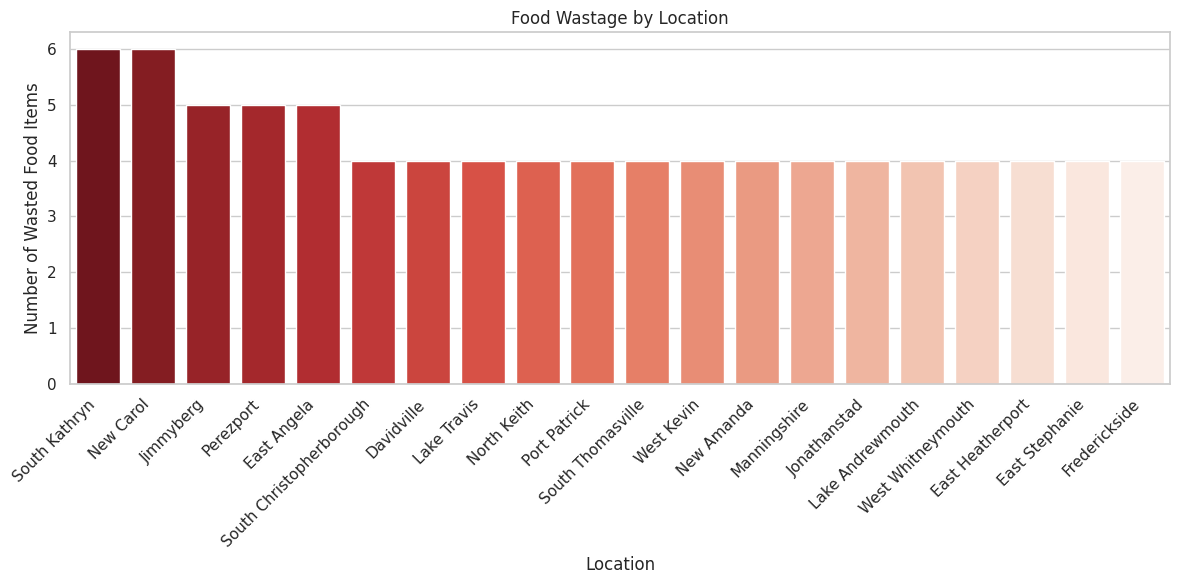

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
df_wal=wastage_by_location.head(20) #20 top locations
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_wal.index, y=df_wal.values, palette="Reds_r")

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel("Location")
plt.ylabel("Number of Wasted Food Items")
plt.title("Food Wastage by Location")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Wastage by Food Category

wastage_by_type = (
    foodlist_df[foodlist_df['Wasted'] == True]
    .groupby('Food_Type')['Food_ID']
    .count()
    .sort_values(ascending=False)
)
print(wastage_by_type)  #which food categories are most often wasted.

Food_Type
Vegetarian        336
Vegan             334
Non-Vegetarian    330
Name: Food_ID, dtype: int64


/tmp/ipython-input-2509270488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wastage_by_type.index, y=wastage_by_type.values, palette="Reds_r")


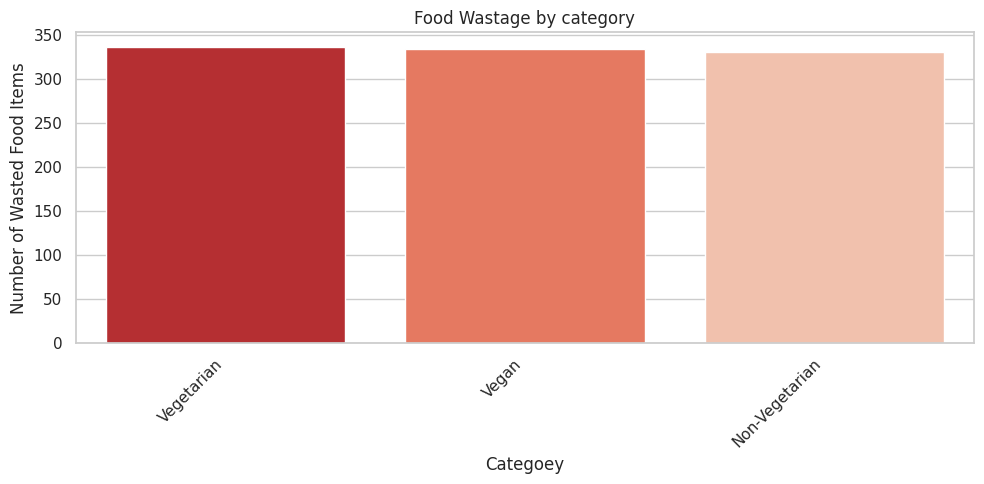

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=wastage_by_type.index, y=wastage_by_type.values, palette="Reds_r")

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel("Categoey")
plt.ylabel("Number of Wasted Food Items")
plt.title("Food Wastage by category")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Wastage by Meal Type

wastage_by_meal = (
    foodlist_df[foodlist_df['Wasted'] == True]
    .groupby('Meal_Type')['Food_ID']
    .count()
    .sort_values(ascending=False)
)
print(wastage_by_meal)    #Find if breakfast/lunch/dinner items expire faster

Meal_Type
Breakfast    254
Snacks       253
Lunch        248
Dinner       245
Name: Food_ID, dtype: int64


/tmp/ipython-input-148517558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wastage_by_meal.index, y=wastage_by_meal.values, palette="Reds_r")


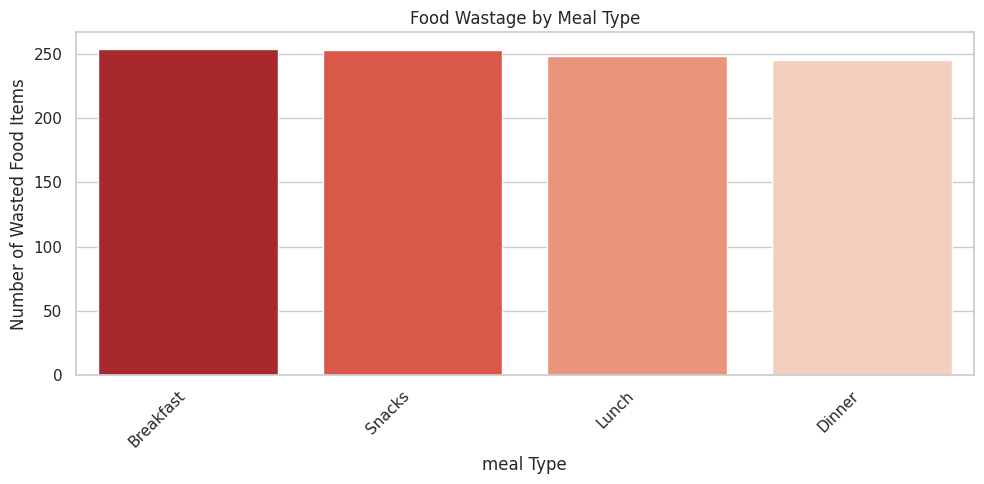

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=wastage_by_meal.index, y=wastage_by_meal.values, palette="Reds_r")

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel("meal Type")
plt.ylabel("Number of Wasted Food Items")
plt.title("Food Wastage by Meal Type")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Suggested Redistribution Priority Report

# Filter items that are available but near expiry (within 3 days)
redistribution_priority = foodlist_df[
    (foodlist_df['Wasted'] == False) &
    (foodlist_df['Expiry_Date'] <= pd.Timestamp.now() + pd.Timedelta(days=3))
].sort_values('Expiry_Date')

print(redistribution_priority[['Food_ID', 'Food_Name', 'Location', 'Expiry_Date']])  #which available foods need to be sent out first before they expire.

Empty DataFrame
Columns: [Food_ID, Food_Name, Location, Expiry_Date]
Index: []


#Deployment using Streamlit app

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.6 MB/s eta 0:00:00


In [ ]:
%%writefile foods_app.py
import streamlit as st
import pandas as pd
import mysql.connector
import plotly.express as px
import matplotlib.pyplot as plt

#Connect to the new database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="food_waste_mgts"
)
cursor = conn.cursor()


st.title("Food Waste Managment Systems")
#st.header("waste mgt")
# ---- SIDEBAR MENU ----
st.sidebar.title("Navigation")
cursor = conn.cursor()
foodlisting_df = pd.read_csv("foodlisting.csv")
claims_df = pd.read_csv("claims.csv")
providers_df = pd.read_csv("provider.csv")
receivers_df = pd.read_csv("receiver.csv")
menu = st.sidebar.radio(
    "Go to",
    ("Home", "Food Listings", "Claims", "Receivers","Providers","Analytics")
)

# ---- MAIN CONTENT ----
if menu == "Home":
    st.subheader("Welcome to the Food Waste Management System")
    st.write("This dashboard helps track and manage food donations effectively.")
    #st.write("This dashboard helps track and manage food donations effectively.")
elif menu == "Food Listings":
    st.subheader("Food Listings")
    st.write("Display available and wasted food items here.")
    st.dataframe(foodlisting_df)

    st.subheader("🍲 Food Listings Search & Filter")


    # ---- Filtering ----
    #filtered_df = foodlisting_df.copy()
    #food_type = st.selectbox("Select Food Type", ["All"] + sorted(foodlisting_df["Food_Type"].dropna().unique()))
    #meal_type = st.selectbox("Select Meal Type", ["All"] + sorted(foodlisting_df["Meal_Type"].dropna().unique()))
    #city = st.selectbox("Select City", ["All"] + sorted(foodlisting_df["Location"].dropna().unique()))
    #provider = st.selectbox("Select Provider", ["All"] + sorted(foodlisting_df["Provider_ID"].dropna().astype(str).unique()))
    #food_id = st.selectbox("Select Food ID", ["All"] + sorted(foodlisting_df["Food_ID"].dropna().astype(str).unique()))


    # --- Initialize session_state keys ---
    for key in ["food_type", "meal_type", "city", "provider", "food_id", "last_filter"]:
      if key not in st.session_state:
        st.session_state[key] = "All" if key != "last_filter" else None

    # --- Dropdowns with keys ---
    food_type = st.selectbox(
         "Select Food Type",
        ["All"] + sorted(foodlisting_df["Food_Type"].dropna().unique()),
        key="food_type"
    )

    meal_type = st.selectbox(
        "Select Meal Type",
        ["All"] + sorted(foodlisting_df["Meal_Type"].dropna().unique()),
        key="meal_type"
    )

    city = st.selectbox(
        "Select City",
         ["All"] + sorted(foodlisting_df["Location"].dropna().unique()),
        key="city"
    )

    provider = st.selectbox(
        "Select Provider",
        ["All"] + sorted(foodlisting_df["Provider_ID"].dropna().astype(str).unique()),
        key="provider"
    )

    food_id = st.selectbox(
        "Select Food ID",
        ["All"] + sorted(foodlisting_df["Food_ID"].dropna().astype(str).unique()),
        key="food_id"
    )

    # --- Track last changed filter ---
    for key in ["food_type", "meal_type", "city", "provider", "food_id"]:
       if st.session_state[key] != "All":
         st.session_state["last_filter"] = key

    # --- Apply only the last filter ---
    filtered_df = foodlisting_df.copy()
    if st.session_state["last_filter"]:
      lf = st.session_state["last_filter"]
      value = st.session_state[lf]

      # Map keys to actual dataframe columns
      column_map = {
        "food_type": "Food_Type",
        "meal_type": "Meal_Type",
        "city": "Location",
        "provider": "Provider_ID",
        "food_id": "Food_ID"
       }
      col = column_map[lf]
      filtered_df = filtered_df[filtered_df[col].astype(str) == str(value)]

    # --- Show Result ---
    st.write(f"🔍 {len(filtered_df)} records found (filtered by {st.session_state['last_filter']} = {st.session_state.get(st.session_state['last_filter'],'All')})")
    st.dataframe(filtered_df)


elif menu == "Claims":
    st.subheader("Claims")
    st.write("Show claims data and allow CRUD operations.")
    st.dataframe(claims_df)
elif menu == "Receivers":
    st.subheader("Receivers")
    st.write("Generate and view wastage and distribution Receivers.")
    receivers_df = pd.read_csv("receiver.csv")
    #st.dataframe(receivers_df)

    # ---- Function to insert receiver ----
    def create_receiver(receiver_id, name, type, city, contact):

        cursor = conn.cursor()
        sql = """
           INSERT INTO receivers (Receiver_ID, Name, Type, City, Contact)
            VALUES (%s, %s, %s, %s, %s)
         """
        cursor.execute(sql, (receiver_id, name, type_, city, contact))
        conn.commit()


    # ---- Streamlit UI ----
    st.subheader(" Add New Receiver")

    with st.form("receiver_form"):
        receiver_id = st.text_input("Receiver ID")
        name = st.text_input("Name")
        type_ = st.selectbox("Type", ["NGO", "Charity", "Shelter", "Individual", "Other"])
        city = st.text_input("City")
        contact = st.text_input("Contact")

        submitted = st.form_submit_button("Add Receiver")

        if submitted:
           if receiver_id and name and city and contact:
            try:
                create_receiver(receiver_id, name, type_, city, contact)
                st.success(f"✅ Receiver '{name}' added successfully!")
            except Exception as e:
                st.error(f" Error: {e}")
        else:
            st.warning("⚠️ Please fill all required fields.")

    # ---- Function to fetch receivers ----
    def read_receivers():

        cursor = conn.cursor()
        cursor.execute("SELECT Receiver_ID, Name, Type, City, Contact FROM receivers")
        rows = cursor.fetchall()

        return pd.DataFrame(rows, columns=["Receiver_ID", "Name", "Type", "City", "Contact"])

    # ---- Streamlit UI ----
    st.subheader("📋 List of Receivers")

    if st.button("Load Receivers"):

           df = read_receivers()
           if not df.empty:
            st.dataframe(df)   # shows as interactive table
           else:
            st.info("No receivers found in the database.")

    st.subheader("🔄 Update Receiver")
    # ---- Update Receiver ----
    def update_receiver(receiver_id, name, type_, city, contact):

        cursor = conn.cursor()
        sql = """
              UPDATE receivers
              SET Name=%s, Type=%s, City=%s, Contact=%s
              WHERE Receiver_ID=%s
        """
        cursor.execute(sql, (name, type_, city, contact, receiver_id))
        #conn.commit()


         # ---- Streamlit UI ----
    #st.subheader("🔄 Update Receiver")

    # Show receivers table
    dfr = read_receivers()
    #st.dataframe(dfr)

    # Select Receiver to update
    receiver_ids = dfr["Receiver_ID"].tolist()
    selected_id = st.selectbox("Select Receiver ID to Update", receiver_ids)

    # Prefill current details
    selected_row = dfr[dfr["Receiver_ID"] == selected_id].iloc[0]

    with st.form("update_form"):
        new_name = st.text_input("Name", selected_row["Name"])
        new_type = st.text_input("Type", selected_row["Type"])
        new_city = st.text_input("City", selected_row["City"])
        new_contact = st.text_input("Contact", selected_row["Contact"])
        submitted = st.form_submit_button("Update Receiver")

        if submitted:
            update_receiver(selected_id, new_name, new_type, new_city, new_contact)
            st.success(f" Receiver {selected_id} updated successfully!")
            #conn.commit()

    # ---- Delete Receiver ----
    def delete_receiver(receiver_id):

        cursor = conn.cursor()
        sql = "DELETE FROM receivers WHERE Receiver_ID=%s"
        cursor.execute(sql, (receiver_id,))
        conn.commit()

    # ---- Streamlit UI ----
    st.subheader("🗑️ Delete Receiver")

    # Show receivers table
    dfr = read_receivers()
    #st.dataframe(df)

    # Select Receiver to delete
    receiver_ids = dfr["Receiver_ID"].tolist()
    selected_id = st.selectbox("Select Receiver ID to Delete", receiver_ids)

    if st.button("Delete Receiver"):
       delete_receiver(selected_id)
       st.success(f"✅ Receiver {selected_id} deleted successfully!")


elif menu == "Providers":
    st.subheader("Providers")
    st.write("Generate and view wastage and distribution Providers.")
    providers_df = pd.read_csv("provider.csv")
    st.dataframe(providers_df)

    st.title("🏢 Provider Information")

    # Dropdown for Provider Name
    provider_name = st.selectbox(
    "Select Provider Name",
    ["All"] + sorted(providers_df["Name"].dropna().unique())
    )

    if provider_name != "All":
       details = providers_df[providers_df["Name"] == provider_name][["Name","Address"]]
       st.subheader("📍 Provider Address")
       st.dataframe(details)

    # Dropdown for Provider ID
    provider_id = st.selectbox(
    "Select Provider ID",
    ["All"] + sorted(providers_df["Provider_ID"].dropna().astype(str).unique())
    )

    if provider_id != "All":
       details = providers_df[providers_df["Provider_ID"].astype(str) == str(provider_id)][
        ["Provider_ID","Type", "Name", "Address", "City"]
       ]
       st.subheader("ℹ️ Provider Details")
       st.dataframe(details)

elif menu == "Analytics":
    st.subheader("Analytics")
    st.write("Generate and view wastage and distribution Analytics.")

    #st.title("Food Providers & Receivers")
    #providers_df = pd.read_csv("provider.csv")
    #receivers_df = pd.read_csv("receiver.csv")

    st.title("Food Providers & Receivers")

    # Q1: How many food providers are there in each city?
    with st.expander("▶ How many food providers are there in each city?"):
         cursor.execute("""
        SELECT city, COUNT(*) AS Providers
        FROM providers
        GROUP BY city
    """)
    providers_df1 = pd.DataFrame(cursor.fetchall(), columns=["City", "Providers"])
    st.dataframe(providers_df1)

    fig = px.bar(providers_df1, x="City", y="Providers", title="Food Providers per City",
                color="Providers", text="Providers")
    st.plotly_chart(fig)

    # Q2: How many food receivers are there in each city?
    with st.expander("▶ How many food receivers are there in each city?"):
         cursor.execute("""
        SELECT city, COUNT(*) AS Receivers
        FROM receivers
        GROUP BY city
    """)
    receivers_df1 = pd.DataFrame(cursor.fetchall(), columns=["City", "Receivers"])
    st.dataframe(receivers_df1)
    #merged_counts = pd.merge(providers_df1, receivers_df1, on="City", how="outer").fillna(0)
   # st.dataframe(merged_counts)

    fig = px.bar(receivers_df1, x="City", y="Receivers", title="Food Receivers per City",
                color="Receivers", text="Receivers")
    st.plotly_chart(fig)

    # Q3: Which type of food provider contributes the most food?
    with st.expander("▶ Which type of food provider contributes the most food?"):
         cursor.execute("""
        SELECT type, COUNT(*) AS Contribution
        FROM providers
        GROUP BY type
        ORDER BY Contribution DESC
    """)
    #st.dataframe(pd.DataFrame(cursor.fetchall(), columns=["Type", "Contributions"]))
    df = pd.DataFrame(cursor.fetchall(), columns=["Type", "Contributions"])
    st.dataframe(df)
    # Plot bar chart
    st.write("Contributions by Provider Type")
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(df["Type"], df["Contributions"] )
    ax.set_xlabel("Provider Type")
    ax.set_ylabel("Number of Contributions")
    ax.set_title("Food Contributions by Provider Type")
    plt.xticks(rotation=45)
    st.pyplot(fig)

    # Q4: Contact information of food providers in a specific city
    with st.expander("▶ What is the contact information of food providers in a specific city?"):
         cursor.execute("SELECT DISTINCT city FROM providers")
    cities = [row[0] for row in cursor.fetchall()]
    selected_city = st.selectbox("Select a city", cities)

    cursor.execute("""
        SELECT name, contact
        FROM providers
        WHERE city = %s
    """, (selected_city,))
    st.dataframe(pd.DataFrame(cursor.fetchall(), columns=["Name", "Contact"]))

    # Q5: Which receivers have claimed the most food?
    with st.expander("▶ Which receivers have claimed the most food?"):
        cursor.execute("""
        SELECT r.name, COUNT(c.claim_id) AS Total_Claims
        FROM claims c
        JOIN receivers r ON c.receiver_id = r.receiver_id
        GROUP BY r.name
        ORDER BY Total_Claims DESC
    """)
    #st.dataframe(pd.DataFrame(cursor.fetchall(), columns=["Receiver Name", "Total Claims"])
    df1 = pd.DataFrame(cursor.fetchall(), columns=["Receiver Name", "Total Claims"])
    st.dataframe(df1)

    fig = px.bar(
    df1.head(10),  # Top 10 cities for clarity
    x="Receiver Name",
    y="Total Claims",
    orientation="h",
    title="receivers have claimed the most food horizontal bar chart",
    labels={"Total Claims": "Total Claims", "City": "City"},
    color="Total Claims",
    color_continuous_scale="viridis"
      )

    st.plotly_chart(fig, use_container_width=True)

    st.title("Food Listings & Availability")

    # Q6: Total quantity of food available
    with st.expander("▶ What is the total quantity of food available from all providers?"):
       cursor.execute("""
        SELECT SUM(Quantity) AS Total_Quantity
        FROM foodlisting1
        WHERE Wasted = False;
    """)
    result = cursor.fetchone()
    st.write(f"**Total Quantity Available:** {result[0]} units")

    # Q7: City with the highest number of food listings
    with st.expander("▶ Which city has the highest number of food listings?"):
       cursor.execute("""
        SELECT Location AS City, COUNT(*) AS Total_Listings
        FROM foodlisting
        GROUP BY Location
        ORDER BY Total_Listings DESC;

    """)
    df2 = pd.DataFrame(cursor.fetchall(), columns=["City", "Total_Listings"])
    st.dataframe(df2)

    fig = px.bar(
    df2.head(10),  # Top 10 cities for clarity
    x="Total_Listings",
    y="City",
    orientation="h",
    title="Top Cities by Number of Food Listings horizontal bar chart",
    labels={"Total_Listings": "Number of Listings", "City": "City"},
    color="Total_Listings",
    color_continuous_scale="viridis"
      )

    st.plotly_chart(fig, use_container_width=True)

    # Q8: Most commonly available food types
    with st.expander("▶ What are the most commonly available food types?"):
       cursor.execute("""
        SELECT food_type, COUNT(*) AS Frequency
        FROM foodlisting1
        WHERE Wasted = False
        GROUP BY food_type
        ORDER BY Frequency DESC;
    """)
    df3 = pd.DataFrame(cursor.fetchall(), columns=["Food Type", "Frequency"])
    st.dataframe(df3)
    # Q9: Most common food types
    with st.expander("▶ What are the most common food types?"):
        cursor.execute("""
        SELECT food_type, COUNT(*) AS Frequency
        FROM foodlisting1
        WHERE Wasted = True
        GROUP BY food_type
        ORDER BY Frequency DESC;
    """)
    df4 = pd.DataFrame(cursor.fetchall(), columns=["Food Type", "Frequency"])
    st.dataframe(df4)

    # Plot bar chart
    st.write("Common food Type")
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(df4["Food Type"], df4["Frequency"] )
    ax.set_xlabel("Food Type")
    ax.set_ylabel("Frequency")
    ax.set_title("Common Food Type")
    plt.xticks(rotation=45)
    st.pyplot(fig)

    st.title("Claims & Distribution")

    # Q10: Food claims per food item
    with st.expander("▶ How many food claims have been made for each food item?"):
        cursor.execute("""
        SELECT f.food_name, COUNT(c.claim_id) AS Total_Claims
        FROM claims c
        JOIN foodlisting f ON c.food_id = f.food_id
        GROUP BY f.food_name
        ORDER BY Total_Claims DESC;
    """)
    df5 = pd.DataFrame(cursor.fetchall(), columns=["Food Item", "Total Claims"])
    st.dataframe(df5)

    # Q11: Provider with highest successful food claims
    with st.expander("▶ Which provider has had the highest number of successful food claims?"):
        cursor.execute("""
        SELECT p.name AS Provider_Name, COUNT(c.Claim_id) AS Successful_Claims
        FROM claims c
        JOIN foodlisting f ON c.food_id = f.food_id
        JOIN providers p ON f.provider_id = p.provider_id
        WHERE c.status = 'Completed'
        GROUP BY p.name
        ORDER BY Successful_Claims DESC;
    """)
    df6 = pd.DataFrame(cursor.fetchall(), columns=["Provider Name", "Successful Claims"])
    st.dataframe(df6)

    #Q12: Percentage of claims by status
    with st.expander("▶ What percentage of food claims are completed vs. pending vs. canceled?"):
        cursor.execute("""
        SELECT status,
               COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims) AS Percentage
        FROM claims
        GROUP BY status;
    """)
    df7 = pd.DataFrame(cursor.fetchall(), columns=["Status", "Percentage (%)"])
    st.dataframe(df7)

    # Plot bar chart
    st.write("Percentage of claims by status")
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(df7["Status"], df7["Percentage (%)"] )
    ax.set_xlabel("Status")
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Percentage of claims by status")
    plt.xticks(rotation=45)
    st.pyplot(fig)

    st.title("Analysis & Insights")

    # Q13: Average quantity of food claimed per receiver
    with st.expander("▶ What is the average quantity of food claimed per receiver?"):
        cursor.execute("""
        SELECT r.name AS Receiver_Name,
               AVG(f.Quantity) AS Avg_Quantity_Claimed
        FROM claims c
        JOIN receivers r ON c.receiver_id = r.receiver_id
        JOIN foodlisting f ON c.food_id = f.food_id
        GROUP BY r.name
        ORDER BY Avg_Quantity_Claimed DESC;
    """)
    df8 = pd.DataFrame(cursor.fetchall(), columns=["Receiver Name", "Avg Quantity Claimed"])
    st.dataframe(df8)

    # Q14: Most claimed meal type
    with st.expander("▶ Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?"):
        cursor.execute("""
        SELECT f.meal_type, COUNT(c.claim_id) AS Total_Claims
        FROM claims c
        JOIN foodlisting f ON c.food_id = f.food_id
        GROUP BY f.meal_type
        ORDER BY Total_Claims DESC

    """)
    df9 = pd.DataFrame(cursor.fetchall(), columns=["Meal Type", "Total Claims"])
    st.dataframe(df9)

    # Plot bar chart
    st.write("Most claimed meal type")
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(df9["Meal Type"], df9["Total Claims"] )
    ax.set_xlabel("Meal Type")
    ax.set_ylabel("Total Claims")
    ax.set_title("Most claimed meal type")
    plt.xticks(rotation=45)
    st.pyplot(fig)

    # Q15: Total quantity of food donated by each provider
    with st.expander("▶ What is the total quantity of food donated by each provider?"):
        cursor.execute("""
        SELECT p.Name AS Provider_Name, SUM(f.Quantity) AS Total_Donated
        FROM foodlisting f
        JOIN providers p ON f.provider_id = p.provider_id
        GROUP BY p.Name
        ORDER BY Total_Donated DESC;
    """)
    df10 = pd.DataFrame(cursor.fetchall(), columns=["Provider Name", "Total Donated Quantity"])
    st.dataframe(df10)



